In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#数据导入
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
sample = pd.read_csv('input/sample_submission.csv')

In [2]:
train.dtypes.sort_values()
train.select_dtypes(include='int64').head()
train.select_dtypes(include='float64').head()
train.select_dtypes(include='object').head()
train.isnull().sum()[train.isnull().sum()>0]

belongs_to_collection    2396
genres                      7
homepage                 2054
overview                    8
poster_path                 1
production_companies      156
production_countries       55
runtime                     2
spoken_languages           20
tagline                   597
Keywords                  276
cast                       13
crew                       16
dtype: int64

In [3]:
train.belongs_to_collection = train.belongs_to_collection.fillna("unknow")
test.belongs_to_collection = test.belongs_to_collection.fillna("unknow")

train.genres = train.genres.fillna("unknow")
test.genres = test.genres.fillna("unknow")

train.homepage = train.homepage.fillna("unknow")
test.homepage = test.homepage.fillna("unknow")

train.overview = train.overview.fillna("unknow")
test.overview = test.overview.fillna("unknow")

train.poster_path = train.poster_path.fillna("unknow")
test.poster_path = test.poster_path.fillna("unknow")

train.production_companies = train.production_companies.fillna("unknow")
test.production_companies = test.production_companies.fillna("unknow")

train.production_countries = train.production_countries.fillna("unknow")
test.production_countries = test.production_countries.fillna("unknow")

train.runtime = train.runtime.fillna(train.runtime.mean())
test.runtime = test.runtime.fillna(train.runtime.mean())

train.spoken_languages = train.spoken_languages.fillna("unknow")
test.spoken_languages = test.spoken_languages.fillna("unknow")

train.tagline = train.tagline.fillna("unknow")
test.tagline = test.tagline.fillna("unknow")

train.Keywords = train.Keywords.fillna("unknow")
test.Keywords = test.Keywords.fillna("unknow")

train.cast = train.cast.fillna("unknow")
test.cast = test.cast.fillna("unknow")

train.crew = train.crew.fillna("unknow")
test.crew = test.crew.fillna("unknow")

train.title = train.title.fillna("unknow")
test.title = test.title.fillna("unknow")

train.status = train.status.fillna(train.status.mode())
test.status = test.status.fillna(train.status.mode())

train.release_date = train.release_date.fillna("unknow")
test.release_date = test.release_date.fillna("unknow")

In [5]:
train['genres2'] = train.genres.apply(lambda x: x.count('id'))
test['genres2'] = test.genres.apply(lambda x: x.count('id'))

train['cast2'] = train.cast.apply(lambda x: x.count('cast_id'))
test['cast2'] = test.cast.apply(lambda x: x.count('cast_id'))

train['Keywords2'] = train.Keywords.apply(lambda x: x.count('id'))
test['Keywords2'] = test.Keywords.apply(lambda x: x.count('id'))

train['title2'] = train.title.apply(lambda x: len(x))
test['title2'] = test.title.apply(lambda x: len(x))

train['tagline2'] = train.tagline.apply(lambda x: len(x))
test['tagline2'] = test.tagline.apply(lambda x: len(x))

train['spoken_languages2'] = train.spoken_languages.apply(lambda x: x.count('name'))
test['spoken_languages2'] = test.spoken_languages.apply(lambda x: x.count('name'))

train['production_countries2'] = train.production_countries.apply(lambda x: x.count('name'))
test['production_countries2'] = test.production_countries.apply(lambda x: x.count('name'))

train['crew2'] = train.crew.apply(lambda x: x.count('id'))
test['crew2'] = test.crew.apply(lambda x: x.count('id'))

train['overview2'] = train.overview.apply(lambda x: len(x))
test['overview2'] = test.overview.apply(lambda x: len(x))

train['original_title2'] = train.original_title.apply(lambda x: len(x))
test['original_title2'] = test.original_title.apply(lambda x: len(x))

train['homepage2'] = train.homepage.apply(lambda x: 0 if x=='unknow' else 1)
test['homepage2'] = test.homepage.apply(lambda x: 0 if x=='unknow' else 1)

train['belongs_to_collection2'] = train.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)
test['belongs_to_collection2'] = test.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)

train['production_companies2'] = train.production_companies.apply(lambda x: x.count('id'))
test['production_companies2'] = test.production_companies.apply(lambda x: x.count('id'))


In [7]:
test.release_date[test.release_date=="unknow"] = 0000-00-00
train['release_date_year'] = train.release_date.apply(lambda x: pd.to_datetime(x).year)
train['release_date_month'] = train.release_date.apply(lambda x: pd.to_datetime(x).month)
train['release_date_day'] = train.release_date.apply(lambda x: pd.to_datetime(x).day)
train['release_date_weekday'] = train.release_date.apply(lambda x: pd.to_datetime(x).weekday())
test['release_date_year'] = test.release_date.apply(lambda x: pd.to_datetime(x).year)
test['release_date_month'] = test.release_date.apply(lambda x: pd.to_datetime(x).month)
test['release_date_day'] = test.release_date.apply(lambda x: pd.to_datetime(x).day)
test['release_date_weekday'] = test.release_date.apply(lambda x: pd.to_datetime(x).weekday())

/Users/wangjian/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
train.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)

test.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)


tmdb = pd.concat([train, test], sort=False)
tmdb = pd.get_dummies(tmdb)
len_train = len(train)
len_test = len(test)
train = tmdb[:len_train]
test = tmdb[len_train:]

In [10]:
train.corr()

,budget,popularity,runtime,revenue,genres2,cast2,Keywords2,title2,tagline2,spoken_languages2,...,homepage2,belongs_to_collection2,production_companies2,release_date_year,release_date_month,release_date_day,release_date_weekday,status_Post Production,status_Released,status_Rumored
budget,1.000000,0.342356,0.238350,0.752965,0.234188,0.308950,0.155782,0.070870,0.005879,0.101914,...,0.247627,0.222932,0.247177,0.046047,0.031094,0.025745,-0.116030,NaN,0.022019,-0.022019
popularity,0.342356,1.000000,0.133669,0.461460,0.084100,0.312118,0.166551,0.001345,0.027200,0.036527,...,0.164797,0.155896,0.152154,0.059965,-0.010692,0.039877,-0.093627,NaN,0.013791,-0.013791
runtime,0.238350,0.133669,1.000000,0.216363,0.057920,0.223345,0.114359,-0.034325,0.044346,0.182172,...,0.041066,-0.036916,0.086465,0.097886,0.130190,0.044116,-0.080314,NaN,0.050660,-0.050660
revenue,0.752965,0.461460,0.216363,1.000000,0.163654,0.335737,0.187864,0.109664,0.003403,0.064961,...,0.263179,0.339425,0.150750,0.020593,0.020164,0.045699,-0.141090,NaN,0.016806,-0.016806
genres2,0.234188,0.084100,0.057920,0.163654,1.000000,0.068102,0.092414,0.021387,0.077180,0.076848,...,0.006122,0.101065,0.050456,-0.059273,-0.011342,-0.002040,-0.024834,NaN,0.016478,-0.016478
cast2,0.308950,0.312118,0.223345,0.335737,0.068102,1.000000,0.185914,-0.014781,0.061018,0.074356,...,0.140999,0.098710,0.159687,0.101857,0.020150,-0.001328,-0.082202,NaN,0.034840,-0.034840
Keywords2,0.155782,0.166551,0.114359,0.187864,0.092414,0.185914,1.000000,0.006715,0.132719,0.082623,...,0.108406,0.095447,0.138316,-0.025271,-0.003885,0.031230,-0.052761,NaN,0.020955,-0.020955
title2,0.070870,0.001345,-0.034325,0.109664,0.021387,-0.014781,0.006715,1.000000,-0.013322,-0.009009,...,0.025032,0.224087,-0.041319,-0.032068,0.013365,0.005026,-0.032485,NaN,-0.045372,0.045372
tagline2,0.005879,0.027200,0.044346,0.003403,0.077180,0.061018,0.132719,-0.013322,1.000000,0.035967,...,-0.102100,0.011678,-0.008381,-0.126272,0.026243,0.025476,0.004573,NaN,-0.004027,0.004027
spoken_languages2,0.101914,0.036527,0.182172,0.064961,0.076848,0.074356,0.082623,-0.009009,0.035967,1.000000,...,0.061505,0.046633,0.140106,0.024759,0.046043,-0.001126,-0.050975,NaN,-0.063716,0.063716


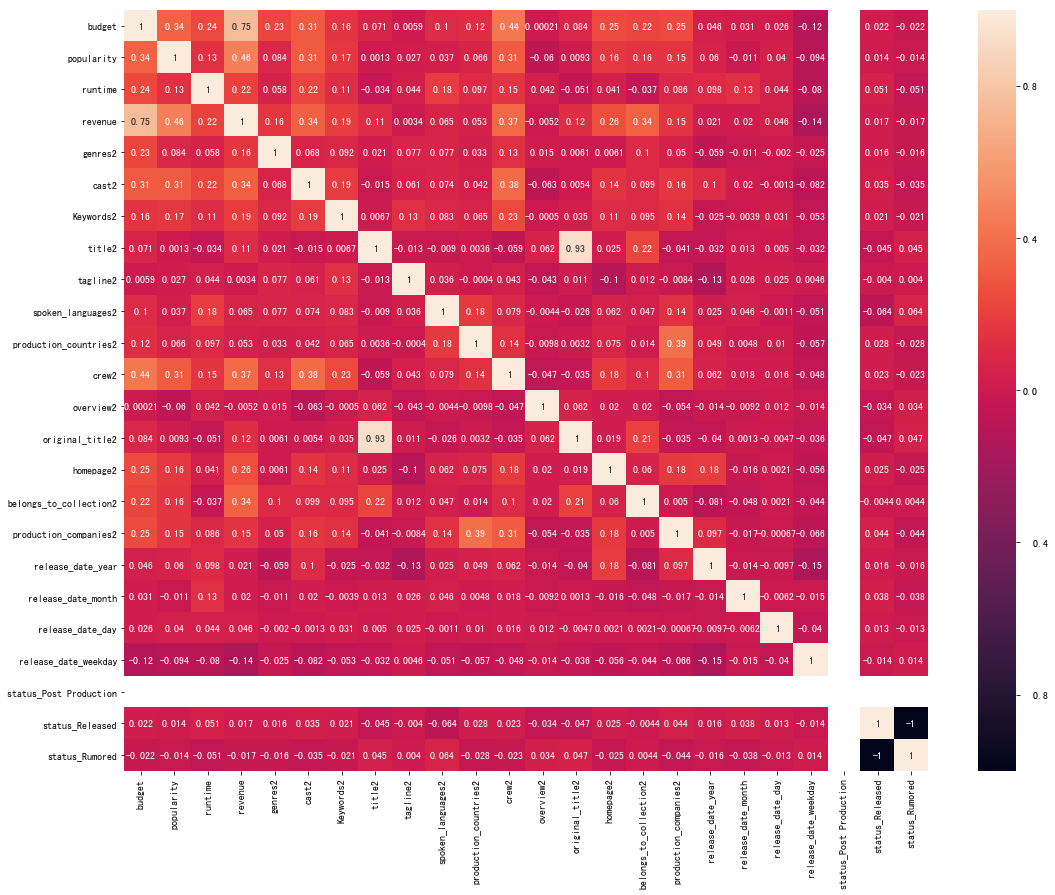

In [16]:
fig = plt.figure(figsize=(18,14))
sns.heatmap(train.corr(), annot=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from math import sqrt

tmdb = pd.concat([train, test], sort=False)
tmdb = pd.get_dummies(tmdb)
len_train = len(train)
len_test = len(test)
train = tmdb[:len_train]
test = tmdb[len_train:]

train.revenue = train.revenue.astype('int')

xtrain=train.drop("revenue", axis=1)
ytrain=train['revenue']
xtest=test.drop("revenue", axis=1)

train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y)
val_preds = my_model.predict(val_X)

val_preds = my_model.predict(val_X)
val_preds[val_preds<0] = 0
rmsle = np.sqrt(mean_squared_log_error( val_preds, val_y))
print("RMSLE: %2f" %sqrt(rmsle))

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSLE: 2.340592


In [25]:
test2 = pd.read_csv('input/test.csv')
pred = my_model.predict(xtest)
output = pd.DataFrame({'id': test2.id, 'revenue': pred})

In [27]:
output.to_csv('submission2.csv', index=False)

In [38]:
from sklearn.model_selection import cross_val_score
XGB = XGBRegressor(n_estimators=1000, learning_rate=0.05)
score_xgb = cross_val_score(XGB, xtrain, ytrain, scoring='neg_mean_absolute_error', cv=5)
np.mean(score_xgb)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


-41320320.585562825

In [32]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [36]:
np.mean(score_xgb)

-6332843478207599.0

In [39]:
model = XGB.fit(xtrain, ytrain)
pred = model.predict(xtest)
output = pd.DataFrame({'id': test2.id, 'revenue': pred})
output.to_csv('submission3.csv', index=False)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [42]:
from sklearn import tree
model_tree = tree.DecisionTreeRegressor()
score_tree = cross_val_score(model_tree, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
-np.mean(score_tree)

8.549019751248977

In [44]:
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
score_lr = cross_val_score(model_lr, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
#ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
-np.mean(score_lr)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [45]:
from sklearn import svm
model_svr = svm.SVR()
score_svr = cross_val_score(model_svr, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
-np.mean(score_svr)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

9.825930245789454

In [46]:
train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
model_svr.fit(train_X, train_y)
val_preds = model_svr.predict(val_X)

val_preds = model_svr.predict(val_X)
val_preds[val_preds<0] = 0
rmsle = np.sqrt(mean_squared_log_error( val_preds, val_y))
print("RMSLE: %2f" %sqrt(rmsle))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSLE: 1.720772


In [47]:
pred = model_svr.predict(xtest)
output = pd.DataFrame({'id': test2.id, 'revenue': pred})
output.to_csv('submission4.csv', index=False)

In [48]:
score_svr

array([-10.38512048, -10.29581288,  -9.30282557, -10.78603055,
        -8.35986175])

In [49]:
sqrt(-np.mean(score_svr))

3.1346339891268733

In [50]:
sqrt(-np.mean(score_tree))

2.9238706796383758

In [51]:
train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
model_tree.fit(train_X, train_y)
val_preds = model_tree.predict(val_X)

val_preds[val_preds<0] = 0
rmsle = np.sqrt(mean_squared_log_error( val_preds, val_y))
print("RMSLE: %2f" %sqrt(rmsle))

pred = model_tree.predict(xtest)
output = pd.DataFrame({'id': test2.id, 'revenue': pred})
output.to_csv('submission5.csv', index=False)

RMSLE: 1.745536


In [52]:
from sklearn import tree
model_tree = tree.DecisionTreeRegressor()
score_tree = cross_val_score(model_tree, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_tree))

3.0209513750501644

In [54]:
from sklearn import svm
model_svr = svm.SVR()
score_svr = cross_val_score(model_svr, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_svr))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

3.1346339891268733

In [55]:
from sklearn import neighbors
model_KN = neighbors.KNeighborsRegressor()
score_KN = cross_val_score(model_KN, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_KN))

2.773263082440288

In [56]:
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)
score_RFR = cross_val_score(model_RandomForestRegressor, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_RFR))

2.605502887865027

In [57]:
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)
score_Ada = cross_val_score(model_AdaBoostRegressor, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_Ada))

4.0268009361187636

In [58]:
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)
score_GBRT = cross_val_score(model_GradientBoostingRegressor, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_GBRT))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [59]:
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
score_bagging = cross_val_score(model_BaggingRegressor, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_bagging))

2.582278884987304

In [60]:
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()
score_ExtraTree = cross_val_score(model_ExtraTreeRegressor, xtrain, ytrain, scoring='neg_mean_squared_log_error', cv=5)
sqrt(-np.mean(score_ExtraTree))

3.0739896502931807

In [63]:
model_BaggingRegressor.fit(xtrain, ytrain)
pred = model_BaggingRegressor.predict(xtest)
output = pd.DataFrame({'id': test2.id, 'revenue': pred})
output.to_csv('submission5.csv', index=False)

In [85]:
def try_model(model):
	model_name = str(model)
	train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
	model.fit(train_X, train_y)
	val_preds = model.predict(val_X)
	val_preds[val_preds<0] = 0
	rmsle = np.sqrt(mean_squared_log_error( val_preds, val_y))
	print("%s - RMSLE: %2f" % (model_name, sqrt(rmsle)))


try_model(model_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) - RMSLE: 2.767681


In [86]:
model_list = [model_tree, model_lr, model_svr, model_KN, model_RandomForestRegressor, 
			  model_AdaBoostRegressor, model_GradientBoostingRegressor, model_BaggingRegressor,
			  model_ExtraTreeRegressor]

for model in model_list:
	try_model(model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') - RMSLE: 1.751659
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) - RMSLE: 2.767681


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) - RMSLE: 1.720772
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') - RMSLE: 1.616668
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) - RMSLE: 1.550610
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) - RMSLE: 1.978459
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=

In [87]:
def try_model(model):
	model_name = str(model)
	train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
	model.fit(train_X, train_y)
	val_preds = model.predict(val_X)
	val_preds[val_preds<0] = 0
	rmsle = np.sqrt(mean_squared_log_error( val_preds, val_y))
	print("%s - RMSLE: %2f" % (model_name, sqrt(rmsle)))

model_list = [model_tree, model_lr, model_svr, model_KN, model_RandomForestRegressor, 
			  model_AdaBoostRegressor, model_GradientBoostingRegressor, model_BaggingRegressor,
			  model_ExtraTreeRegressor]

for model in model_list:
	try_model(model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') - RMSLE: 1.810392
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) - RMSLE: 2.767681


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) - RMSLE: 1.720772
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') - RMSLE: 1.616668
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) - RMSLE: 1.549855
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) - RMSLE: 1.979983
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=

In [88]:
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=100)

In [89]:
try_model(model_RandomForestRegressor)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) - RMSLE: 1.542982
